In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor']='w'

In [3]:
#Defining the function of acceleration
def acc(x, v, F):
    return ((-gamma*v) - ((k/m)*x) + F)

In [4]:
#Defining the function rk4 for forward integration

def rk4(X0, V0, Tf, dt, F):#X0=initial position, V0=initial velocity
    N = int(Tf/dt) #Tf=Final time, dt=time step
    X = np.zeros(N+1, float)
    V = np.zeros(N+1, float)
    T = np.zeros(N+1, float)
    
    X[0] = X0
    V[0] = V0
    
    for n in range (1, N+1):
        T[n] = n*dt
        x0 = X[n-1]
        v0 = V[n-1]
        h = dt
        
        k1x = v0
        k1v = acc(x0, v0, F[n-1])
        k2x = v0 + (k1v*h/2)
        k2v = acc((x0 + (k1x*h/2)), (v0 + (k1v*h/2)), F[n-1])
        k3x = v0 + (k2v*h/2)
        k3v = acc((x0 + (k2x*h/2)), (v0 + (k2v*h/2)), F[n-1])
        k4x = v0 + (k3v*h)
        k4v = acc(x0 + (k3x*h), v0 + (k3v*h), F[n-1])
        
        X[n] = x0 + (dt*(k1x + 2*k2x + 2*k3x + k4x)/6)
        V[n] = v0 + (dt*(k1v + 2*k2v + 2*k3v + k4v)/6)
    
    return T, X, V

In [5]:
Fgauss = np.random.normal(1, 0.1, size = 1000000)#gaussian randomness
Funi = np.random.uniform(size = 10000)#uniform randomness

## Checking smaller dt

In [6]:
#Forced damped harmonic oscillator - gaussian

k = 1 #spring constant
m = 1 #mass
gamma = 0.01 
Final = 500
dt = 0.001
F = Fgauss

tr, xr, vr = rk4(1, 0, Final, dt, F)

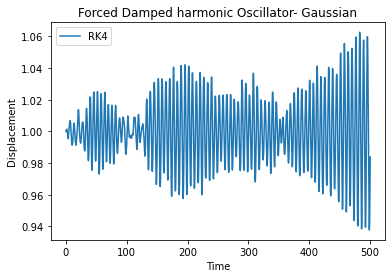

In [7]:
#plt.plot(tr, xr, color='b', s=1, label = 'RK4')
plt.plot(tr, xr, label = 'RK4')
plt.title("Forced Damped harmonic Oscillator- Gaussian")
plt.xlabel("Time")
plt.ylabel("Displacement")
plt.legend()
#plt.xlim(0, 1)
plt.show()

## Checking eqn 38

In [8]:
##Underdamped Case
%%time
#Calculating the trajectories of 1000 particles, and taking the averages across all trials

trials = 1000
k = 1
m = 1
gamma = 0.2 #damping constant
Final = 200
dt = 0.1
N = int(Final/dt) +1

#2-D arrays
X_val = np.zeros(shape=(trials, N))
Xsqr_val = np.zeros(shape=(trials, N))
V_val = np.zeros(shape=(trials, N))
Vsqr_val = np.zeros(shape=(trials, N))

for i in range (0, trials):
    F = np.random.normal(0, 1, size = N)
    tr, xr, vr = rk4(0, 1, Final, dt, F)
    X_val[i] = xr
    V_val[i] = vr
    Xsqr_val[i] = np.square(xr)
    Vsqr_val[i] = np.square(vr)
    C = np.multiply(vr, F)
    
X_avg = np.sum(X_val, axis=0) / trials
Xsqr_avg = np.sum(Xsqr_val, axis=0) / trials
V_avg = np.sum(V_val, axis=0) / trials
Vsqr_avg = np.sum(Vsqr_val, axis=0) / trials
C = np.sum(C, axis=0) / trials

CPU times: user 17.3 s, sys: 50.5 ms, total: 17.3 s
Wall time: 17.6 s


$$ \text{Equation 26} $$

$$\frac{d^2\sigma_x^2}{dt^2} + \beta\frac{d\sigma_x^2}{dt} + 2\omega^2\sigma_x^2 = 2\frac{k_B T}{m}$$

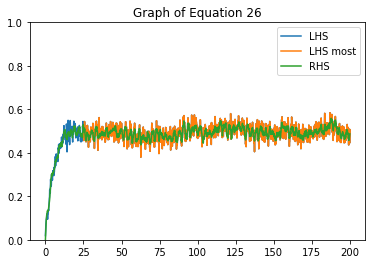

k_b*T/m =  0.24698456513519154
0.4827051088026416


In [9]:
#Equation 26- Numerical calculating the standard deviation and its derivatives, to obtain a value of KbT/m

var = Xsqr_avg - np.square(X_avg)
var_v = Vsqr_avg - np.square(V_avg)

dx = np.zeros(len(var), float)
ddx = np.zeros(len(var), float)

for i in range (1, len(var)):
    dx[i-1] = (var[i] - var[i-1])/dt
    
for i in range(1, len(dx)):
    ddx[i-1] = (dx[i] - dx[i-1])/dt
    
eqn = ddx + gamma*dx + 2*(k/m)*var
usable = eqn[250:]
tr_usable = tr[250:]

plt.plot(tr, eqn, label="LHS")
plt.plot(tr_usable, usable, label="LHS most")
plt.plot(tr, 2*var_v, label="RHS")
plt.ylim(0, 1)
plt.legend()
plt.title("Graph of Equation 26")
plt.show()


avg1 = np.sum(eqn, axis=0)/len(eqn)
avg2 = np.sum(2*var_v, axis=0)/len(var_v)
avg3 = np.sum(usable, axis=0)/len(usable)

print("k_b*T/m = ", avg3/2)
print(avg1)

$$ \text{Equation 38} $$

$$\bar{\omega}_1 = \sqrt{\omega^2 - (\beta^2/8)} $$

$$\langle x^2(t)\rangle_o = \langle x(t)\rangle^2 + \frac{k_B T}{m\omega^2} \times \Bigl\{ 1- e^{-\frac{1}{2}\beta t} \Bigl( -2\sin^2{\frac{\sqrt{2}}{2}\bar{\omega}_1 t} + \frac{\beta}{\sqrt{8}\bar{\omega}_1}\sin{\sqrt{2}\bar{\omega}_1 t} + 1 \Bigr) \Bigr\}$$

$$ \text{Equation 40} $$

$$\omega_1 = \sqrt{\omega^2 - (\beta^2/4)} $$

$$\langle x^2(t)\rangle_c = \langle x(t)\rangle^2 + \frac{k_B T}{m\omega^2} \Bigl\{ 1- e^{-\beta t} \times \Bigl( \frac{\beta^2}{2\omega_1^2} \sin^2{\omega_1 t} + \frac{\beta}{2\omega_1}\sin{2\omega_1 t} + 1 \Bigr) \Bigr\}$$

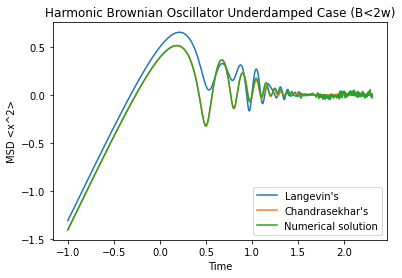

In [10]:
#Equation 38 and 40- comparing the numerical integration with langevin's(38) and chandrashekahar's(40) analytical solutions for MSD
#The underdamped case, where gamma < 2*omega


x_sqr = np.square(X_avg)

beta=gamma
omega=1
omega1=np.sqrt(omega**2-((beta**2)/8))
y=(avg3/2)/(omega**2) #KT/m*w^2
#x_sqr=np.square(V_avg)
omegaa1=np.sqrt(omega**2-(beta)**2/4)

x_function1=x_sqr + y*(1- np.exp(-beta*tr/2) * ((-2*(np.sin(omega1*tr/np.sqrt(2)))**2) + (beta*np.sin(omega1*tr*np.sqrt(2))/(omega1*np.sqrt(8)))+1))
x_function2=x_sqr + y*(1- np.exp(-beta*tr) * ((((beta**2)*(np.sin(omegaa1*tr))**2)/(2*omegaa1**2)) + (beta*np.sin(2*omegaa1*tr)/(2*omegaa1)) + 1))
x_function3= Xsqr_avg
x_function4 = x_function1/y
x_function5 = x_function2/y
x_function6 = x_function3/y

x_axis=np.log10(tr[1:])
y_axis1=np.log10(x_function4[1:])
y_axis2=np.log10(x_function5[1:])
y_axis3 = np.log10(x_function6[1:])

plt.plot(x_axis, y_axis1, label="Langevin's")
plt.plot(x_axis, y_axis2, label="Chandrasekhar's")
plt.plot(x_axis, y_axis3, label="Numerical solution")

plt.ylabel('MSD <x^2>')
plt.xlabel('Time')
plt.legend()
plt.title('Harmonic Brownian Oscillator Underdamped Case (B<2w)')
plt.show()

$$ \text{Equation 54} $$

$$ \langle v^2(t)\rangle_o = \langle v(t)\rangle^2 + \Bigl( \sigma_0^2 - \frac{k_B T \omega^2}{m (\omega^2 + \beta^2)} \Bigr) e^{-2 \beta t} + \frac{k_B T \omega^2}{m (\omega^2 + \beta^2)}e^{-\frac{1}{2}\beta t} \times \Bigl[ \cos{\sqrt{2}\bar{\omega}_1 t} - \frac{3 \beta}{\sqrt{8}\bar{\omega}_1}\sin{\sqrt{2}\bar{\omega}_1 t} \Bigr] + \frac{C_1}{\beta m} \Bigl( 1- e^{-2 \beta t}\Bigr)$$


$$ \text{Equation 56} $$

$$\omega_1 = \sqrt{\omega^2 - (\beta^2/4)} $$

$$\langle v^2(t)\rangle_c = \langle v(t)\rangle^2 + \frac{k_B T}{m} \Bigl\{ 1- e^{-\beta t} \times \Bigl( \frac{\beta^2}{2\omega_1^2} \sin^2{\omega_1 t} - \frac{\beta}{2\omega_1}\sin{2\omega_1 t} + 1 \Bigr) \Bigr\}$$

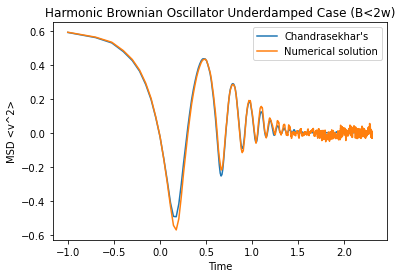

In [14]:
#Equation 54 and 56- comparing the numerical integration with langevin's (54) and chandrashekahar's(56) analytical solutions for MSV
#The overdamped case, where gamma > 2*omega



v_sqr = np.square(V_avg)
beta=gamma
omega=np.sqrt(k/m)
C=(avg3/2)
omegaa1=np.sqrt(omega**2-(beta)**2/4)


v_function2 = v_sqr + C*(1- (np.exp(-beta*tr))*(((np.sin(omegaa1*tr))**2 * (beta**2)/(2*omegaa1**2)) - (np.sin(omegaa1*tr)*beta/(2*omegaa1)) + 1))
v_function3 = Vsqr_avg
v_function5 = v_function2/C
v_function6 = v_function3/C

x_axis=np.log10(tr[1:])
#y_axis1=np.log10(v_function4[1:])
y_axis2=np.log10(v_function5[1:])
y_axis3 = np.log10(v_function6[1:])

#plt.plot(x_axis, y_axis1, label="Langevin's")
plt.plot(x_axis, y_axis2, label="Chandrasekhar's")
plt.plot(x_axis, y_axis3, label="Numerical solution")

plt.ylabel('MSD <v^2>')
plt.xlabel('Time')
plt.legend()
plt.title('Harmonic Brownian Oscillator Underdamped Case (B<2w)')
plt.show()